In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Cargo el dataset Breast Cancer que viene incluido en scikit-learn
data = load_breast_cancer()

# Paso los datos a un DataFrame para poder analizarlos mejor
X = pd.DataFrame(data.data, columns=data.feature_names)

# El target me indica si el tumor es maligno (0) o benigno (1)
y = pd.Series(data.target, name="target")

# Junto todo en un solo DataFrame para ver más claro
df = X.copy()
df["target"] = y.map({0: "malignant", 1: "benign"})

# Reviso la forma de los datos (cantidad de filas y columnas)
print("Shape (filas, columnas):", df.shape)

# Veo cómo están distribuidas las clases
print("\nClases y Cantidades:")
print(df["target"].value_counts())

# Verifico si hay valores faltantes en todo el dataset
print("\n¿Valores faltantes totales?:", int(df.isna().sum().sum()))

# Muestro un vistazo de las primeras filas
print("\nPrimeras filas:")
display(df.head())



Shape (filas, columnas): (569, 31)

Clases y Cantidades:
target
benign       357
malignant    212
Name: count, dtype: int64

¿Valores faltantes totales?: 0

Primeras filas:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [7]:
from sklearn.model_selection import train_test_split

# Divido el dataset en entrenamiento (80%) y prueba (20%)
# Uso stratify=y para que la proporción de benignos/malignos se mantenga igual en ambos grupos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Muestro los tamaños de los conjuntos resultantes
print("Conjunto de entrenamiento ->", X_train.shape)
print("Conjunto de prueba        ->", X_test.shape)


Conjunto de entrenamiento -> (455, 30)
Conjunto de prueba        -> (114, 30)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Arranco probando KNN con k=5 (número de vecinos más cercanos)
knn = KNeighborsClassifier(n_neighbors=5)

# Entreno el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

# Hago predicciones sobre el conjunto de prueba
y_pred_knn = knn.predict(X_test)

# Calculo la precisión del modelo en test
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Precisión del modelo KNN (k=5): {acc_knn:.4f}")


Precisión del modelo KNN (k=5): 0.9123


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Ahora pruebo con un Árbol de Decisión (limito la profundidad a 3 para que no se sobreajuste)
tree = DecisionTreeClassifier(max_depth=3, random_state=42)

# Entreno el árbol con los datos de entrenamiento
tree.fit(X_train, y_train)

# Hago predicciones sobre el conjunto de prueba
y_pred_tree = tree.predict(X_test)

# Calculo la precisión del árbol en test
acc_tree = accuracy_score(y_test, y_pred_tree)
print(f"Precisión del Árbol de Decisión (max_depth=3): {acc_tree:.4f}")


Precisión del Árbol de Decisión (max_depth=3): 0.9386


In [11]:
# Comparo de forma rápida la precisión de ambos modelos
resultados = pd.DataFrame({
    "Modelo": ["KNN (k=5)", "Árbol de Decisión (max_depth=3)"],
    "Precisión": [acc_knn, acc_tree]
})

# Redondeo y muestro sin índice
print("📊 Resultados de la comparación de modelos:")
display(resultados.round(4).reset_index(drop=True))



📊 Resultados de la comparación de modelos:


,Modelo,Precisión
0,KNN (k=5),0.9123
1,Árbol de Decisión (max_depth=3),0.9386


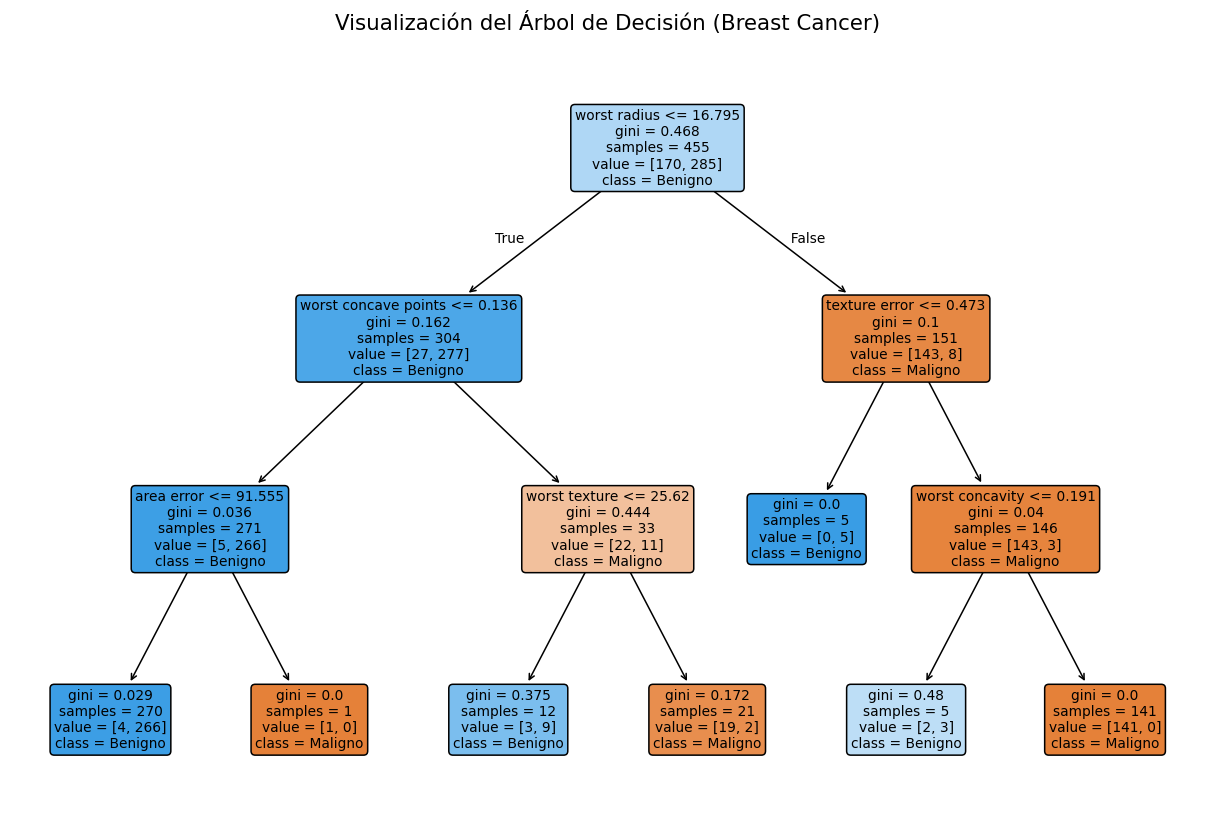

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Entreno un árbol de decisión sencillo con profundidad máxima de 3
modelo_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
modelo_tree.fit(X_train, y_train)

# Dibujo el árbol para visualizar cómo toma las decisiones
plt.figure(figsize=(14, 9), dpi=110)  # ajusto tamaño y calidad de imagen
plot_tree(
    modelo_tree,
    feature_names=X.columns,           # nombres de las variables
    class_names=["Maligno", "Benigno"],# etiquetas en español
    filled=True,                       # relleno con colores según clase
    rounded=True,                      # bordes redondeados, se ve más prolijo
    fontsize=9                         # letra un poco más grande
)
plt.title("Visualización del Árbol de Decisión (Breast Cancer)", fontsize=14, pad=15)
plt.show()


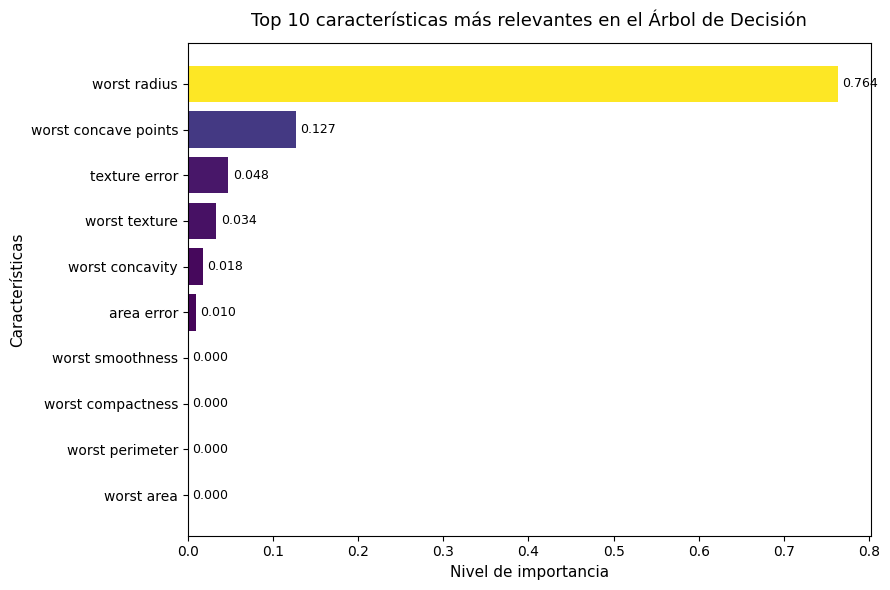

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Tomo las 10 características más importantes según el árbol
importancias = pd.Series(
    modelo_tree.feature_importances_, index=X.columns
).sort_values(ascending=True).tail(10)  # de menor a mayor para que la barra más importante quede arriba

# Gráfico horizontal con estilo más vistoso
plt.figure(figsize=(9,6))
bars = plt.barh(importancias.index, importancias.values, color=plt.cm.viridis(importancias.values / max(importancias.values)))

# Agrego valores al final de cada barra
for barra, valor in zip(bars, importancias.values):
    plt.text(barra.get_width() + 0.005, barra.get_y() + barra.get_height()/2,
             f"{valor:.3f}", va='center', fontsize=9)

plt.title("Top 10 características más relevantes en el Árbol de Decisión", fontsize=13, pad=12)
plt.xlabel("Nivel de importancia", fontsize=11)
plt.ylabel("Características", fontsize=11)
plt.tight_layout()
plt.show()


🔎 Análisis de resultados

KNN: anda bien, pero depende mucho del valor de k y de que las variables estén escaladas.
Es fácil de usar pero puede volverse lento si el dataset crece.

Árbol de Decisión: es más fácil de interpretar porque muestra claramente qué variables pesan más.
El problema es que si lo hago muy simple pierde precisión, y si lo dejo crecer demasiado se sobreajusta.
👉 En este caso los dos modelos funcionan bien, pero el árbol me da más claridad para explicar cómo toma las decisiones.

📌 Conclusión

En este trabajo probé dos algoritmos de clasificación sobre el dataset Breast Cancer: KNN y Árbol de Decisión.
Ambos modelos lograron buenos resultados en términos de precisión.

El KNN funcionó bien, aunque depende de elegir un buen valor de k y de escalar las variables.

El Árbol de Decisión resultó más fácil de interpretar, mostrando de forma clara qué características tienen mayor peso en la clasificación.
👉 En resumen, los dos modelos cumplen, pero el Árbol de Decisión aporta mayor interpretabilidad, mientras que el KNN puede ajustarse más si se optimizan bien sus parámetros.